In [ ]:
# This notebook creates a visualization of datacenter power consumption and power production in the Netherlands from 2017 - 2019 (including)
# Sources used: CBS (Centraal Bureau voor de Statistic -- the national statistical office, Statistics Netherlands)
# Power production: https://opendata.cbs.nl/#/CBS/nl/dataset/37823wkk/table?dl=4E81B
# Datacenter power consumption: https://www.cbs.nl/nl-nl/maatwerk/2020/51/elektriciteit-geleverd-aan-datacenters-2017-2019 

In [220]:
import os
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

%matplotlib inline

In [276]:
datacenter_consumption_nl = {  # In TWh
    2017: {
        'small': 271 / 1000,
        'big': 1376 / 1000,
    },
    2018: {
        'small': 280 / 1000,
        'big': 2071 / 1000,
    },
    2019 : {
        'small': 281 / 1000,
        'big': 2460 / 1000,
    }
}

In [42]:
df = pd.read_csv(os.path.join("energy_data_nl", "energy_production_per_category_nl_2017_2019.csv"), sep=";", thousands=".", decimal=",")
df['Perioden'] = df['Perioden'].map(lambda x : x[:-1])  # Remove the *
df.fillna(0, inplace=True)  # Safety, there are no NaNs in this data, but in case we load a different file in the future

Index(['Bedrijfsgroepen', 'Warmtekrachtkoppelinginstallaties (WKK)',
       'Typen installatie', 'Perioden',
       'Productie/Fysieke eenheden/Productie elektriciteit (MWh)'],
      dtype='object')

In [268]:
# We only count hydroeletric, wind, and solar to renewables. The "Other" category (Overige installaties) may contain elements
# such as biomass which may/may not be seen as renewable. For now, we cannot tell if this category contains renewable
# so we include it in the non-renewable section, as leaving it out gives an incorrect view.
renewables = [
    'Waterkrachtcentrale',  # Hydroeletric power 
    'Windturbine',  # Wind turbines
    'Zonnecellen'  # Solar panels
]

renewable_colors = {
    'Waterkrachtcentrale': 'dodgerblue',
    'Windturbine': 'white', 
    'Zonnecellen': 'yellow',
}

non_renewables =  [
    'Gasmotor',  # Gas engine
    'Stoomturbine', # Steam turbine
    'Steg-eenheid', # Gas & steam turbine
    'Gasturbine', # Gas turbine
    'Kerncentrale', # Nuclear power
    'Overige installaties' # Other
]

non_renewable_colors = {
    'Gasmotor': 'slategrey', 
    'Stoomturbine': 'lightpink', # Steam turbine
    'Steg-eenheid': 'tan', # Gas & steam turbine
    'Gasturbine': 'turquoise', # Gas turbine
    'Kerncentrale': 'red', # Nuclear power
    'Overige installaties': 'purple', # Other
}

translations = {
    'Waterkrachtcentrale': 'Hydroelectric Stations',
    'Windturbine': 'Wind Turbines', 
    'Zonnecellen': 'Solar Cells',
    'Gasmotor': 'Gas Engines', 
    'Stoomturbine': 'Steam Turbines', # Steam turbine
    'Steg-eenheid': 'COGAS Plants', # Gas & steam turbine
    'Gasturbine': 'Gas Turbines', # Gas turbine
    'Kerncentrale': 'Nuclear Power Plants', # Nuclear power
    'Overige installaties': 'Other', # Other
}

# Divide by 1000 to go to GWh
renewable_eletricity_generation = df[df['Typen installatie'].isin(renewables)] 
renewable_eletricity_generation.rename(columns={'Productie/Fysieke eenheden/Productie elektriciteit (MWh)': "Energy Production"}, inplace=True)
renewable_eletricity_generation["Energy Production"] /= 1e6

non_renewable_eletricity_generation = df[df['Typen installatie'].isin(non_renewables)]
non_renewable_eletricity_generation.rename(columns={'Productie/Fysieke eenheden/Productie elektriciteit (MWh)': "Energy Production"}, inplace=True)
non_renewable_eletricity_generation["Energy Production"] /= 1e6

print(renewable_eletricity_generation.head())
print(non_renewable_eletricity_generation.head())

                         Bedrijfsgroepen  \
18  Totaal centrale/decentrale productie   
19  Totaal centrale/decentrale productie   
20  Totaal centrale/decentrale productie   
21  Totaal centrale/decentrale productie   
22  Totaal centrale/decentrale productie   

   Warmtekrachtkoppelinginstallaties (WKK)    Typen installatie Perioden  \
18          Totaal WKK/andere installaties  Waterkrachtcentrale     2017   
19          Totaal WKK/andere installaties  Waterkrachtcentrale     2018   
20          Totaal WKK/andere installaties  Waterkrachtcentrale     2019   
21          Totaal WKK/andere installaties          Windturbine     2017   
22          Totaal WKK/andere installaties          Windturbine     2018   

    Energy Production  
18           0.060757  
19           0.072348  
20           0.074182  
21          10.568801  
22          10.563645  
                        Bedrijfsgroepen  \
3  Totaal centrale/decentrale productie   
4  Totaal centrale/decentrale productie   
5  To

/var/scratch/lvs215/miniconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-268-c25fc85f2283>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renewable_eletricity_generation["Energy Production"] /= 1e6
<ipython-input-268-c25fc85f2283>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

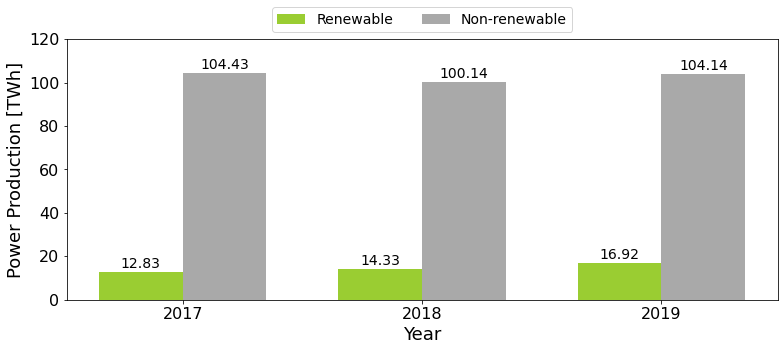

In [272]:
fig, ax = plt.subplots(figsize=(11, 5))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Power Production [TWh]", fontsize=18)

labels = non_renewable_eletricity_generation['Perioden'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
gap = 0.0
rects1 = ax.bar(x - width/2 - gap, renewable_eletricity_generation.groupby('Perioden')["Energy Production"].sum(), width, label='Renewable', color='yellowgreen')
rects2 = ax.bar(x + width/2 + gap, non_renewable_eletricity_generation.groupby('Perioden')["Energy Production"].sum(), width, label='Non-renewable', color='darkgrey')
    
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2, prop={"size": 14}, bbox_to_anchor=(0.5, 1.15), loc=9)
ax.set_ylim(0, 1.2e2)

# Draw a dotted line showing how much the datacenters are consuming
for i in x:
    year = labels[i]
    dc_consumption = datacenter_consumption_nl[int(year)]['small'] + datacenter_consumption_nl[int(year)]['big']
    ax.plot([x-width, x+width], [dc_consumption]*2, color='black', ls='solid', lw=.5)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

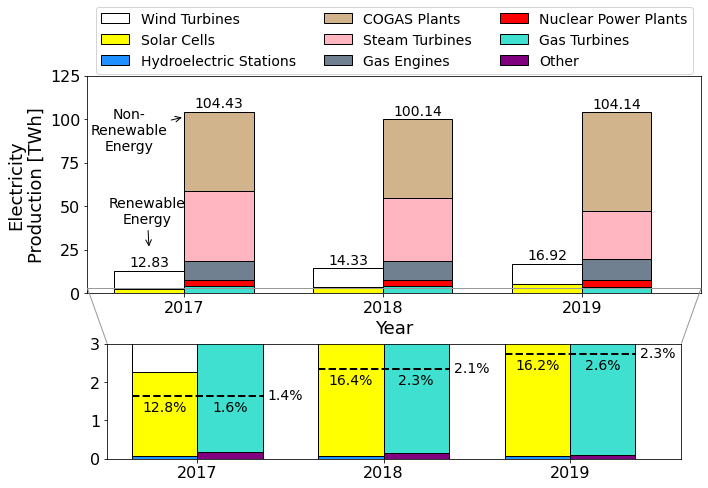

In [315]:
fig, ax = plt.subplots(figsize=(11, 4))

ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Electricity\nProduction [TWh]", fontsize=18)

def plot_stacked_group(axis, df, width, offset, colors, order_sources, annotate=True):
    years = np.sort(df['Perioden'].unique())
    x = np.arange(len(years))  # the label locations
    
    bars = []
    for i in x:
        year = years[i]
        bottom = 0
        for instalatie in order_sources:
            color = colors[instalatie]
            production = df[((df["Typen installatie"] == instalatie) & (df['Perioden'] == year))]['Energy Production'].iloc[0]
            #print(instalatie, year, production)
            bar = axis.bar(i + offset/2, production, width=width, bottom=bottom, color=color, label=instalatie, edgecolor='black')
            bars.append(bar)
            bottom += production
            
        # Add numbers above the bars
        if annotate:
            axis.annotate('{:,.2f}'.format(bottom),
                                xy=(i + offset/2, bottom),
                                xytext=(0, 1),  # 3 points vertical offset
                                textcoords="offset points",
                                ha='center', va='bottom', fontsize=14)
    

# labels = non_renewable_eletricity_generation['Perioden'].unique()

width = 0.35  # the width of the bars
gap = 0.00

years = np.sort(renewable_eletricity_generation['Perioden'].unique())
last_year = np.sort(years)[-1]
# Order the sizes of the sources from small to large
order_sources_renewables = renewable_eletricity_generation[renewable_eletricity_generation['Perioden'] == last_year].sort_values(by="Energy Production")["Typen installatie"]
plot_stacked_group(ax, renewable_eletricity_generation, width, -(width+gap), renewable_colors, order_sources_renewables)

order_sources_non_renewables = non_renewable_eletricity_generation[non_renewable_eletricity_generation['Perioden'] == last_year].sort_values(by="Energy Production")["Typen installatie"]
plot_stacked_group(ax, non_renewable_eletricity_generation, width, width+gap, non_renewable_colors, order_sources_non_renewables)

ax.set_xticks(x)
ax.set_xticklabels(labels)

# Create a custom legend to avoid duplicate
legend_elements_renewable = []
for element in order_sources_renewables:
    color = renewable_colors[element]
    legend_elements_renewable.append(Patch(facecolor=color, edgecolor='black',
                         label=translations[element]))
legend_elements_renewable.reverse()

legend_elements_non_renewable = []
for element in order_sources_non_renewables:
    color = non_renewable_colors[element]
    legend_elements_non_renewable.append(Patch(facecolor=color, edgecolor='black',
                         label=translations[element]))
legend_elements_non_renewable.reverse()

lgd = ax.legend(handles=legend_elements_renewable + legend_elements_non_renewable, ncol=3, prop={"size": 14}, bbox_to_anchor=(0.5, 1.35), loc=9)
ax.set_ylim(0, 1.25e2)
ax.set_xlim(None, x[-1] + 0.6)

# Create annotatations for the reader
sum_renewables_first_year = renewable_eletricity_generation[renewable_eletricity_generation['Perioden'] == years[0]]["Energy Production"].sum()
sum_non_renewables_first_year = non_renewable_eletricity_generation[non_renewable_eletricity_generation['Perioden'] == years[0]]["Energy Production"].sum()

ax.annotate("Renewable\nEnergy",
            xy=(-(width+gap) / 2, sum_renewables_first_year * 2), 
            xycoords='data', xytext=(-2, 25), textcoords='offset points',
            ha='center', fontsize=14, color="black",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="black"
                           )
            )

ax.annotate("Non-\nRenewable\nEnergy",
            xy=(0, sum_non_renewables_first_year * 0.97), 
            xycoords='data', xytext=(-55, 10), textcoords='offset points',
            ha='center', va='top', fontsize=14, color="black",
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc",
                            color="black"
                           )
            )

# Create a zoom based on https://stackoverflow.com/a/26781816 - showing where the DCs consumption lie
limit = 3
x1, x2, y1, y2 = 0.15, -0.45, 0.725, 0.4 # sub region of the original image

ax2 = plt.axes([x1, x2, y1, y2])
plot_stacked_group(ax2, renewable_eletricity_generation, width, -(width+gap), renewable_colors, order_sources_renewables, False)
plot_stacked_group(ax2, non_renewable_eletricity_generation, width, width+gap, non_renewable_colors, order_sources_non_renewables, False)
mark_inset(ax, ax2, loc1=1, loc2=2, facecolor="none", edgecolor="0.6")

ax2.set_ylim(0, limit)
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='minor', labelsize=14)

ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.set_xlim(None, x[-1] + 0.6)

# Draw a dotted line showing how much the datacenters are consuming
for i in x:
    year = labels[i]
    
    dc_consumption = datacenter_consumption_nl[int(year)]['small'] + datacenter_consumption_nl[int(year)]['big']
    sum_renewables_this_year = renewable_eletricity_generation[renewable_eletricity_generation['Perioden'] == year]["Energy Production"].sum()
    sum_non_renewables_this_year = non_renewable_eletricity_generation[non_renewable_eletricity_generation['Perioden'] == year]["Energy Production"].sum()
    
    percentage_renewable = (dc_consumption / sum_renewables_this_year) * 100
    percentage_non_renewable = (dc_consumption / sum_non_renewables_this_year) * 100
    percentage_all = (dc_consumption / (sum_renewables_this_year + sum_non_renewables_this_year)) * 100
    
    ax2.plot([i-(width+gap), i+(width+gap)], [dc_consumption]*2, color='black', ls='dashed', lw=2)
    ax2.annotate('{:.1f}%'.format(percentage_renewable),
                            xy=(i-(width+gap)/2, dc_consumption),
                            xytext=(0, -5),  # 2 point vertical offset
                            textcoords="offset points",
                            ha='center', va='top', fontsize=14)
    ax2.annotate('{:.1f}%'.format(percentage_non_renewable),
                            xy=(i+(width+gap)/2, dc_consumption),
                            xytext=(0, -5),  # 1 point vertical offset
                            textcoords="offset points",
                            ha='center', va='top', fontsize=14)
    ax2.annotate('{:.1f}%'.format(percentage_all),
                            xy=(i+(width+gap), dc_consumption),
                            xytext=(5, 0),  # 1 point horizontal offset
                            textcoords="offset points",
                            ha='left', va='center', fontsize=14)

date_time = datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
# fig.savefig("energy_consumption_datacenters_nl_{}.pdf".format(date_time), bbox_extra_artists=(ax2, lgd), bbox_inches='tight')